# Datenanalyse mit KI & Machine Learning
## Ausreißer

In [101]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Wie können Ausreißer Daten beeinflussen?

In [2]:
numbers1 = [4, 4, 5, 5, 5, 5, 6, 6, 6, 7, 7]

print("Mittelwert:", round(np.mean(numbers1), 2))
print("Median:", np.median(numbers1))
print("Standardabweichung:", round(np.std(numbers1), 2))

Mittelwert: 5.45
Median: 5.0
Standardabweichung: 0.99


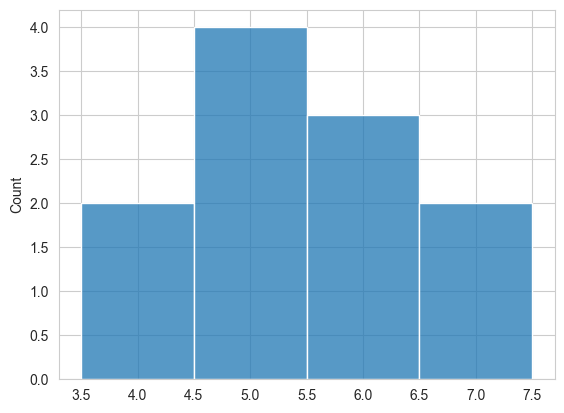

In [8]:
sns.histplot(numbers1, discrete=True);

In [4]:
numbers2 = [4, 4, 5, 5, 5, 5, 6, 6, 6, 7, 7, 300]
print("Mittelwert:", round(np.mean(numbers2), 2))
print("Median:", np.median(numbers2))
print("Standardabweichung:", round(np.std(numbers2), 2))

Mittelwert: 30.0
Median: 5.5
Standardabweichung: 81.41


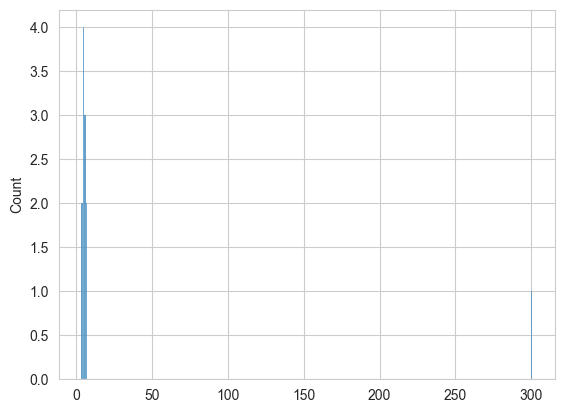

In [5]:
sns.histplot(numbers2, discrete=True);

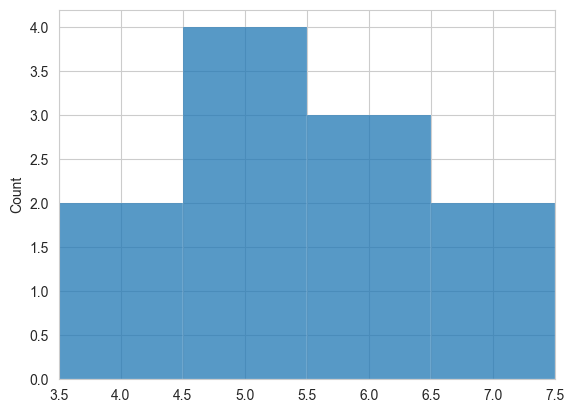

In [6]:
sns.histplot(numbers2, discrete=True)
plt.xlim(3.5, 7.5);

# Visuelle Darstellung von Ausreissern

In [11]:
# Quelle Dataset: https://www.kaggle.com/datasets/redwankarimsony/heart-disease-data
df = pd.read_csv(r'heart_disease_uci.csv', index_col='id')
df.head()

,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
id,,,,,,,,,,,,,,,
1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [12]:
df['num'].unique()

array([0, 2, 1, 3, 4])

In [17]:
df.isna().sum().rename('null_count')

age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
Name: null_count, dtype: int64

In [18]:
df.dropna(subset=['chol'], inplace=True)

In [19]:
df.describe()

,age,trestbps,chol,thalch,oldpeak,ca,num
count,890.000000,834.000000,890.000000,838.000000,831.000000,308.000000,890.000000
mean,53.580899,132.089928,199.130337,137.539379,0.889290,0.678571,1.008989
std,9.389502,19.077093,110.780810,25.989709,1.095398,0.936378,1.145210
min,28.000000,0.000000,0.000000,60.000000,-2.600000,0.000000,0.000000
25%,47.000000,120.000000,175.000000,120.000000,0.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,140.000000,0.500000,0.000000,1.000000
75%,60.000000,140.000000,268.000000,157.000000,1.500000,1.000000,2.000000
max,77.000000,200.000000,603.000000,202.000000,6.200000,3.000000,4.000000


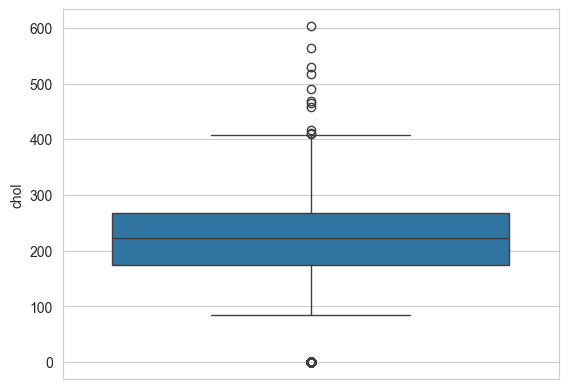

In [20]:
sns.boxplot(y=df['chol'])
plt.show()

In [21]:
df[df['chol'] == 0.0]

,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
id,,,,,,,,,,,,,,,
598,32,Male,Switzerland,typical angina,95.0,0.0,NaN,normal,127.0,False,0.7,upsloping,NaN,NaN,1
599,34,Male,Switzerland,asymptomatic,115.0,0.0,NaN,NaN,154.0,False,0.2,upsloping,NaN,NaN,1
600,35,Male,Switzerland,asymptomatic,NaN,0.0,NaN,normal,130.0,True,NaN,NaN,NaN,reversable defect,3
601,36,Male,Switzerland,asymptomatic,110.0,0.0,NaN,normal,125.0,True,1.0,flat,NaN,fixed defect,1
602,38,Female,Switzerland,asymptomatic,105.0,0.0,NaN,normal,166.0,False,2.8,upsloping,NaN,NaN,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
819,43,Male,VA Long Beach,asymptomatic,122.0,0.0,False,normal,120.0,False,0.5,upsloping,NaN,NaN,1
820,63,Male,VA Long Beach,non-anginal,130.0,0.0,True,st-t abnormality,160.0,False,3.0,flat,NaN,NaN,0
823,48,Male,VA Long Beach,non-anginal,102.0,0.0,NaN,st-t abnormality,110.0,True,1.0,downsloping,NaN,NaN,1


In [22]:
len(df[df['chol'] == 0.0])

172

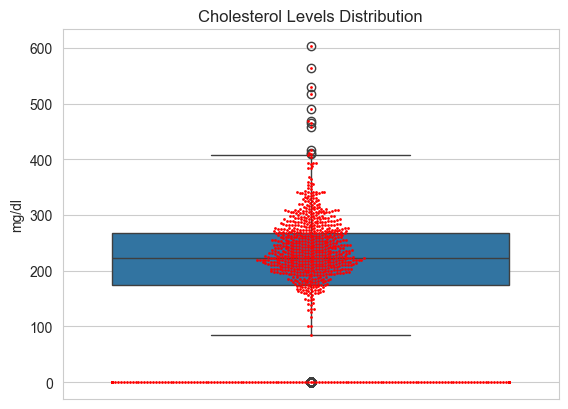

In [37]:
# Kombiniert mit Swarmplot, um die Verteilung noch deutlicher zu sehen:
sns.boxplot(y=df["chol"])
sns.swarmplot(y=df["chol"], color='red', marker='o', size=2)

plt.title("Cholesterol Levels Distribution")
plt.xlabel("")
plt.ylabel("mg/dl");

#### Boxplot berechnet die Quartile in unseren Daten und zeigt automatisch Ausreißer als Punkte jenseits der Whisker an. Wir haben in unseren Daten also ein paar Ausreißer oberhalb unserer Quartile und etliche unterhalb der Quartile auf der Null-Linie.

# Mathematische Berechnung

## 1. Methode: Interquartilsabstand

In [16]:
# Anhand unserer Daten berechnen wir die Quartile und damit den Interquartilsabstand. Alle Daten die sich unterhalb des ersten Quartils - 1,5 * Interquartilsabstand, bzw. über des dritten Quartils + 1,5*Interquartilsabstand befinden, werden als Ausreißer bezeichnet.

In [40]:
q1 = df['chol'].quantile(0.25)
q3 = df['chol'].quantile(0.75)
print("Erstes Quartil:", q1)
print("Drittes Quartil:", q3)

Erstes Quartil: 175.0
Drittes Quartil: 268.0


In [41]:
# Interquartilsabstand (IQR):
iqr = q3 - q1
iqr

np.float64(93.0)

In [42]:
lower_bound = q1 - 1.5 * iqr
lower_bound

np.float64(35.5)

In [43]:
upper_bound = q3 + 1.5 * iqr
upper_bound

np.float64(407.5)

#### Alle Punkte unserer chol Spalte unter 35.5 oder oberhalb von 407.5 stellen Ausreißer dar

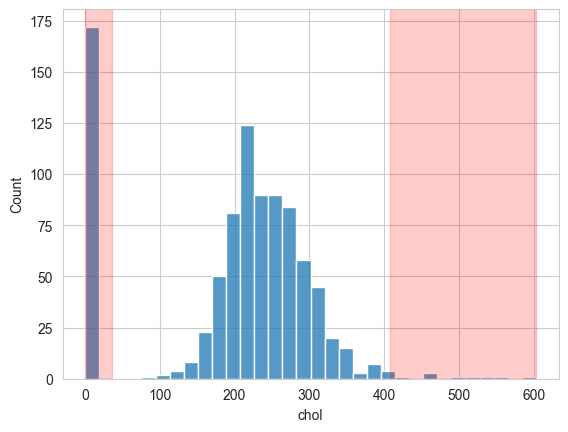

In [44]:
# Visuelle Darstellung der IQR-Methode:
sns.histplot(df['chol'])
plt.axvspan(xmin=df['chol'].min(), xmax=lower_bound, color='red', alpha=0.2)
plt.axvspan(xmin=upper_bound, xmax=df['chol'].max(), color='red', alpha=0.2)
plt.show()

In [45]:
df[df['chol'] < lower_bound]['chol'].unique()

array([0.])

In [46]:
len(df[df['chol'] < lower_bound])

172

# Übungsaufgabe
### Schreibe eine Funktion, der du eine Spalte aus einem Datensatz geben kannst und die dir anschließend als Informationen Q1, Q3, IQR, untere Grenze, obere Grenze und die Anzahl der Ausreißer ausgibt.
#### Optional: Schreibe die Funktion so, dass diese Werte als Output der Funktion zurückgegeben werden.

## 2. Methode: Standardabweichung

In [58]:
diamonds = sns.load_dataset('diamonds')
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


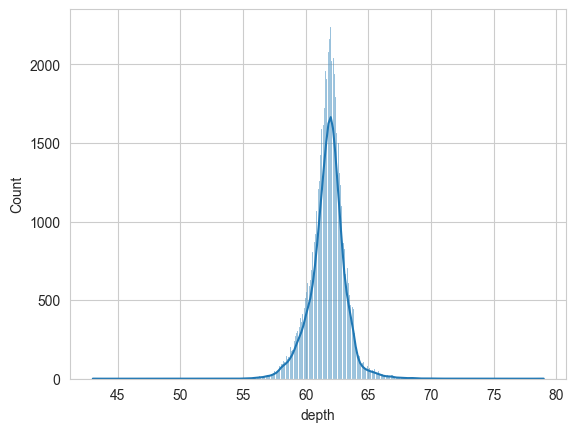

In [60]:
sns.histplot(diamonds['depth'], kde=True);

In [61]:
# Mittelwert:
depth_mean = diamonds['depth'].mean()
depth_mean

np.float64(61.749404894327036)

In [62]:
# Standardabweichung:
depth_std = diamonds['depth'].std()
depth_std

np.float64(1.432621318833661)

In [64]:
# Liegt eine Normalverteilung vor:

# z1 ermittelt die Anzahl aller Werte, die mehr als eine Standardabweichung über ODER unter dem Mittelwert liegen.
z1 = (diamonds['depth'][diamonds['depth'] > (depth_mean + depth_std)].count()
      + diamonds['depth'][diamonds['depth'] < (depth_mean - depth_std)].count())

one_std = (len(diamonds) - z1)/len(diamonds)
print(f"In einer Standarbweichung liegen {one_std:.2%} der Werte.")

# z2 ermittelt die Anzahl aller Werte, die mehr als zwei Standardabweichungen über ODER unter dem Mittelwert liegen.
z2 = (diamonds['depth'][diamonds['depth'] > (depth_mean + 2*depth_std)].count()
      + diamonds['depth'][diamonds['depth'] < (depth_mean - 2*depth_std)].count())

two_std = (len(diamonds) - z2)/len(diamonds)
print(f"In zwei Standarbweichungen liegen {two_std:.2%} der Werte.")

# z3 ermittelt die Anzahl aller Werte, die mehr als zwei Standardabweichungen über ODER unter dem Mittelwert liegen.
z3 = (diamonds['depth'][diamonds['depth'] > (depth_mean + 3*depth_std)].count()
      + diamonds['depth'][diamonds['depth'] < (depth_mean - 3*depth_std)].count())

three_std = (len(diamonds) - z3)/len(diamonds)
print(f"In drei Standarbweichungen liegen {three_std:.2%} der Werte.")

In einer Standarbweichung liegen 74.73% der Werte.
In zwei Standarbweichungen liegen 94.77% der Werte.
In drei Standarbweichungen liegen 98.73% der Werte.


In [65]:
# Obere Grenze:
upper_bound_std = depth_mean + 3*depth_std
upper_bound_std

np.float64(66.04726885082802)

In [66]:
# Untere Grenze:
lower_bound_std = depth_mean - 3*depth_std
lower_bound_std

np.float64(57.45154093782605)

#### alle Punkte unserer depth Spalte unter 57.5 oder oberhalb von 66.1 stellen Ausreißer dar.

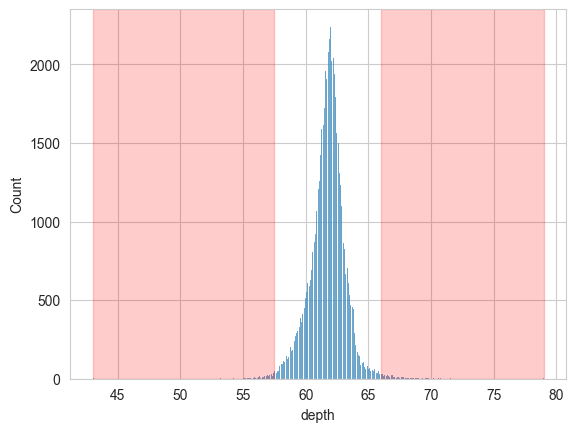

In [69]:
# Visuelle Darstellung der Standardabweichung-Methode
sns.histplot(diamonds["depth"])
plt.axvspan(xmin=diamonds["depth"].min(), xmax=lower_bound_std, color="red", alpha=0.2)
plt.axvspan(xmin=upper_bound_std, xmax=diamonds["depth"].max(), color="red", alpha=0.2);

In [72]:
# Anzahl an Ausreißern
outliers_count = (diamonds[diamonds["depth"] > upper_bound_std].shape[0] 
                     + diamonds[diamonds["depth"] < lower_bound_std].shape[0])
print("Anzahl an Ausreißer:", outliers_count)

outliers_proportion = (diamonds[diamonds["depth"] > upper_bound_std].shape[0] 
                     + diamonds[diamonds["depth"] < lower_bound_std].shape[0])/len(diamonds)
print(f"Prozent an Ausreißern: {outliers_proportion:.3%}")

Anzahl an Ausreißer: 685
Prozent an Ausreißern: 1.270%


# Verfahren mit Ausreißern

## 1. Methode: Trimming (Entfernen)

In [33]:
# Unsere Cholesteroldaten bestanden zu einem großen Teil aus 0. 
# Ein Wert von 0 mg/dl Cholesterol können wir als Messfehler betrachten und deshalb aus unseren Daten entfernen

In [81]:
df_trimmed = df[df['chol'] > 0]
df_trimmed.head()

,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
id,,,,,,,,,,,,,,,
1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [82]:
# Werte vor dem Trimmen (aus ungetrimmten Datensatz):
print(q1)
print(q3)

175.0
268.0


In [83]:
# Quartile bei getrimmtem Datensatz:
q1_trimmed = df_trimmed['chol'].quantile(0.25)
q3_trimmed = df_trimmed['chol'].quantile(0.75)
print("Erstes Quartil:", q1_trimmed)
print("Drittes Quartil:", q3_trimmed)

Erstes Quartil: 210.0
Drittes Quartil: 276.75


In [84]:
# IQR vor dem Trimmen (aus ungetrimmten Datensatz):
iqr

np.float64(93.0)

In [85]:
# Interquartilsabstand bei getrimmtem Datensatz:
iqr_trimmed = q3_trimmed - q1_trimmed
iqr_trimmed

np.float64(66.75)

In [86]:
# Grenzen vor dem Trimmen (aus ungetrimmten Datensatz):
print("Untergrenze:", lower_bound)
print("Obergrenze:", upper_bound)

Untergrenze: 35.5
Obergrenze: 407.5


In [87]:
# Nach dem Trimmen:
lower_bound_trimmed = q1_trimmed - 1.5*iqr_trimmed
lower_bound_trimmed

np.float64(109.875)

In [88]:
# Nach dem Trimmen:
upper_bound_trimmed = q3_trimmed + 1.5*iqr_trimmed
upper_bound_trimmed

np.float64(376.875)

#### Alle Punkte unserer neuen chol Spalte unter 109.9 oder oberhalb von 376.9 stellen Ausreißer dar

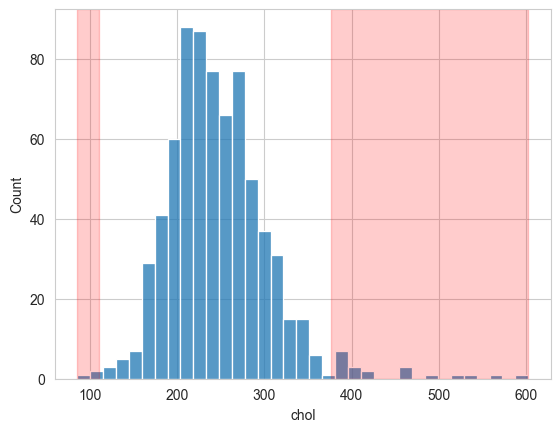

In [92]:
# Ausreißer nach Entfernung der 0:
sns.histplot(df_trimmed["chol"])
plt.axvspan(xmin=df_trimmed["chol"].min(), xmax=lower_bound_trimmed, color="red", alpha=0.2)
plt.axvspan(xmin=upper_bound_trimmed, xmax=df_trimmed["chol"].max(), color="red", alpha=0.2)
plt.show()

In [97]:
df_no_outliers = df_trimmed[df_trimmed['chol'].between(lower_bound_trimmed, upper_bound_trimmed, inclusive='both')]

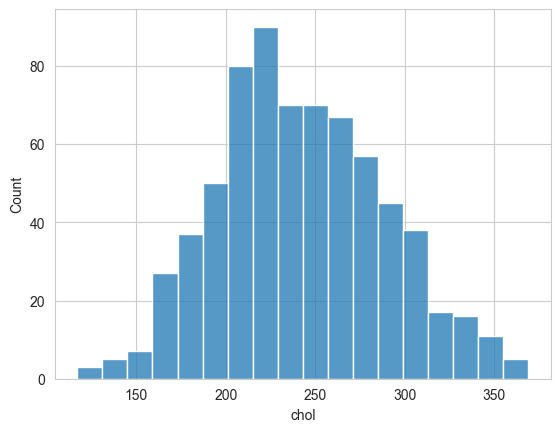

In [100]:
sns.histplot(df_no_outliers['chol']);

## 2. Methode: Capping

In [43]:
# Gehen wir davon aus, dass die depth unserer Diamanten ab einem bestimmten Schwellenwert keine Bedeutung mehr hat. Ab einer bestimmten depth hat der Wert also keinen größeren Einfluss mehr auf z.B. den Preis
# Dann hilft uns Capping

In [128]:
diamonds_capped = diamonds.copy()

In [129]:
upper_bound_std

np.float64(66.04726885082802)

In [130]:
lower_bound_std

np.float64(57.45154093782605)

In [131]:
diamonds_capped['depth'].sort_values(ascending=False)

52861    79.0
52860    79.0
41918    78.2
46679    73.6
53540    72.9
         ... 
36503    51.0
16857    50.8
6341     44.0
10377    43.0
4518     43.0
Name: depth, Length: 53940, dtype: float64

In [132]:
# Ersetzt alle Werte mehr als drei Standardabweichungen über dem Mittelwert mit Obergrenze von einer STD: 
diamonds_capped['depth'] = diamonds_capped['depth'].apply(lambda x: upper_bound_std if x > upper_bound_std else x)

In [133]:
diamonds_capped['depth'].max()

np.float64(66.04726885082802)

In [134]:
# Ersetzt alle Werte mehr als drei Standardabweichungen unter dem Mittelwert durch lower_bound_STD:
diamonds_capped['depth'] = diamonds_capped['depth'].apply(lambda x: lower_bound_std if x < lower_bound_std else x)

In [135]:
diamonds_capped['depth'].min()

np.float64(57.45154093782605)

In [136]:
# Ursprünglicher Mittelwert:
depth_mean

np.float64(61.749404894327036)

In [137]:
# Mittelwert nach Winsorisierung:
depth_capped_mean = diamonds_capped['depth'].mean()
depth_capped_mean

np.float64(61.74596851981033)

In [138]:
# Ursprüngliche Standardabweichung:
depth_std

np.float64(1.432621318833661)

In [139]:
depth_capped_std = diamonds_capped['depth'].std()
depth_capped_std

np.float64(1.3627892095093164)

In [140]:
# Ursprüngliche Untergrenze nach Entfernen der 0-Werte in depth:
lower_bound_trimmed

np.float64(109.875)

In [141]:
lower_bound_capped = depth_capped_mean - 3*depth_capped_std
lower_bound_capped

np.float64(57.657600891282385)

In [142]:
# Ursprüngliche Obergrenze nach Entfernen der 0-Werte in depth:
upper_bound_trimmed

np.float64(376.875)

In [143]:
upper_bound_capped = depth_capped_mean + 3*depth_capped_std
upper_bound_capped

np.float64(65.83433614833828)

#### Alle Punkte unserer depth Spalte unter 57.6 oder oberhalb von 65.8 stellen Ausreißer dar

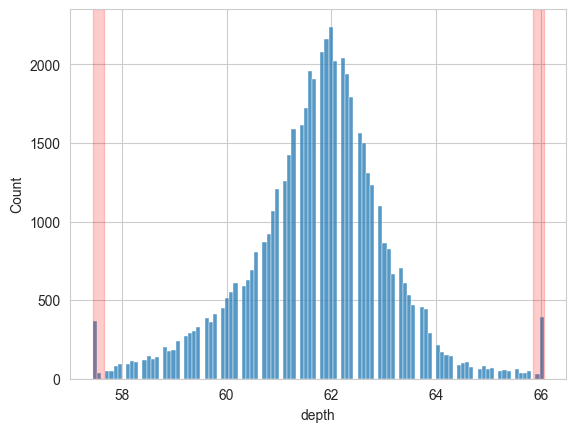

In [144]:
# Visuelle Darstellung der Standardabweichung-Methode
sns.histplot(diamonds_capped['depth'])
plt.axvspan(xmin=diamonds_capped["depth"].min(), xmax=lower_bound_capped, color="red", alpha=0.2)
plt.axvspan(xmin=upper_bound_capped, xmax=diamonds_capped["depth"].max(), color="red", alpha=0.2)
plt.show()

### Kleiner Exkurs zu Dummy-Codierung von Variablen (Feature Engineering!)

In [145]:
df.head()

,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
id,,,,,,,,,,,,,,,
1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [146]:
df.cp.unique()

array(['typical angina', 'asymptomatic', 'non-anginal', 'atypical angina'],
      dtype=object)

In [150]:
dummy_df = pd.get_dummies(df['cp'])
dummy_df

,asymptomatic,atypical angina,non-anginal,typical angina
id,,,,
1,False,False,False,True
2,True,False,False,False
3,True,False,False,False
4,False,False,True,False
5,False,True,False,False
...,...,...,...,...
916,True,False,False,False
917,False,False,False,True
918,True,False,False,False


In [152]:
df['cp']

id
1       typical angina
2         asymptomatic
3         asymptomatic
4          non-anginal
5      atypical angina
            ...       
916       asymptomatic
917     typical angina
918       asymptomatic
919       asymptomatic
920    atypical angina
Name: cp, Length: 890, dtype: object

In [153]:
df_with_dummies = pd.concat([df, dummy_df], axis=1)

In [154]:
df_with_dummies

,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num,asymptomatic,atypical angina,non-anginal,typical angina
id,,,,,,,,,,,,,,,,,,,
1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0,False,False,False,True
2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2,True,False,False,False
3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1,True,False,False,False
4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0,False,False,True,False
5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
916,54,Female,VA Long Beach,asymptomatic,127.0,333.0,True,st-t abnormality,154.0,False,0.0,NaN,NaN,NaN,1,True,False,False,False
917,62,Male,VA Long Beach,typical angina,NaN,139.0,False,st-t abnormality,NaN,NaN,NaN,NaN,NaN,NaN,0,False,False,False,True
918,55,Male,VA Long Beach,asymptomatic,122.0,223.0,True,st-t abnormality,100.0,False,0.0,NaN,NaN,fixed defect,2,True,False,False,False


In [86]:
# Bei get_dummies kann eine Spalte immer weggelassen werden ohne Informationsverlust: 
pd.get_dummies(df['sex'])['Female']

0      False
1      False
2      False
3      False
4       True
       ...  
915     True
916    False
917    False
918    False
919    False
Name: Female, Length: 890, dtype: bool

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 890 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        890 non-null    int64  
 1   age       890 non-null    int64  
 2   sex       890 non-null    object 
 3   dataset   890 non-null    object 
 4   cp        890 non-null    object 
 5   trestbps  834 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       800 non-null    object 
 8   restecg   888 non-null    object 
 9   thalch    838 non-null    float64
 10  exang     838 non-null    object 
 11  oldpeak   831 non-null    float64
 12  slope     603 non-null    object 
 13  ca        308 non-null    float64
 14  thal      432 non-null    object 
 15  num       890 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 118.2+ KB


In [88]:
df_with_dummies.info()

<class 'pandas.core.frame.DataFrame'>
Index: 890 entries, 0 to 919
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               890 non-null    int64  
 1   age              890 non-null    int64  
 2   sex              890 non-null    object 
 3   dataset          890 non-null    object 
 4   cp               890 non-null    object 
 5   trestbps         834 non-null    float64
 6   chol             890 non-null    float64
 7   fbs              800 non-null    object 
 8   restecg          888 non-null    object 
 9   thalch           838 non-null    float64
 10  exang            838 non-null    object 
 11  oldpeak          831 non-null    float64
 12  slope            603 non-null    object 
 13  ca               308 non-null    float64
 14  thal             432 non-null    object 
 15  num              890 non-null    int64  
 16  asymptomatic     890 non-null    bool   
 17  atypical angina  890 